In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/architecture-dataset/multiclass_512x512_zero_padded_22_04.zip'
extract_path = '/content/architecture_dataset'

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)


In [ ]:
import os
import pandas as pd
from collections import Counter

root = '/content/architecture_dataset'
csv_path = os.path.join(root, 'annotations.csv')
df = pd.read_csv(csv_path, header=None, names=['path','labels'])

dataset = []
classes = set()


In [ ]:
skip_next = True
for _, row in df.iterrows():
    if skip_next:
        skip_next = False
        continue
    rel_path = row['path'].replace('\\', '/').strip().rstrip(';')
    img_path = os.path.join(root, rel_path)
    if not os.path.exists(img_path):
        continue
    lbls = [l for l in row['labels'].split(';') if l]
    dataset.append((img_path, lbls))
    classes.update(lbls)

one_root = os.path.join(root, 'one-class')
for c1 in os.listdir(one_root):
    c1_path = os.path.join(one_root, c1)
    if not os.path.isdir(c1_path):
        continue
    for c2 in os.listdir(c1_path):
        c2_path = os.path.join(c1_path, c2)
        if not os.path.isdir(c2_path):
            continue
        for fname in os.listdir(c2_path):
            if not fname.lower().endswith(('.jpg', '.png')):
                continue
            img_path = os.path.join(c2_path, fname)
            if not os.path.exists(img_path):
                # print(f"Missing: {img_path}")
                continue
            lbls = [c1, c2]
            dataset.append((img_path, lbls))
            classes.update(lbls)




In [ ]:

classes = sorted(classes)
print('Classes found:', classes)

cnt = Counter()
for _, lbls in dataset:
    cnt.update(lbls)

print('\nCounts per class:')
for cls in classes:
    print(f'{cls}: {cnt[cls]}')

Classes found: ['Achaemenid architecture', 'American', 'American Foursquare architecture', 'American craftsman style', 'Ancient', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Elizabethan', 'Georgian architecture', 'Gothic', 'Gothic Revival', 'Greek Revival architecture', 'International style', 'Modern', 'Neoclassical', 'Novelty architecture', 'Postmodern', 'Postmodern architecture', 'Pre-Romanesque', 'Renaissance', 'Romanesque', 'Tudor', 'Tudor Revival architecture']

Counts per class:
Achaemenid architecture: 392
American: 726
American Foursquare architecture: 362
American craftsman style: 364
Ancient: 1111
Ancient Egyptian architecture: 406
Art Deco architecture: 566
Art Nouveau architecture: 615
Baroque: 472
Bauhaus architecture: 315
Beaux-Arts architectu

In [ ]:
mapping = {
    'Elizabethan': 'Renaissance',
    'Pre-Romanesque': 'Romanesque',
    'Tudor': 'Renaissance',
    'Gothic Revival': 'Gothic',
    'Postmodern architecture': 'Postmodern'
}

updated_dataset = []
for img, lbls in dataset:
    new_lbls = []
    for lbl in lbls:
        mapped = mapping.get(lbl, lbl)
        if mapped not in new_lbls:
            new_lbls.append(mapped)
    updated_dataset.append((img, new_lbls))
dataset = updated_dataset

classes = sorted({lbl for _, lbls in dataset for lbl in lbls})
cnt = Counter()
for _, lbls in dataset:
    cnt.update(lbls)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

rows = []
for img, lbls in dataset:
    for lbl in lbls:
        rows.append({'Image': img, 'Label': lbl})

image_df = pd.DataFrame(rows)

label_counts = image_df['Label'].value_counts()


In [ ]:
from collections import defaultdict
import random

TARGET_CLASSES = {'Modern', 'Neoclassical'}
MAX_IMAGES = 1100

target_images = []
other_images = []

for img, lbls in dataset:
    if any(lbl in TARGET_CLASSES for lbl in lbls):
        target_images.append((img, lbls))
    else:
        other_images.append((img, lbls))

class_to_images = defaultdict(list)
for img, lbls in target_images:
    for lbl in lbls:
        if lbl in TARGET_CLASSES:
            class_to_images[lbl].append((img, lbls))

selected_images_set = set()
balanced_images = []

for cls in TARGET_CLASSES:
    imgs = class_to_images[cls]
    random.shuffle(imgs)
    count = 0
    for img, lbls in imgs:
        if img in selected_images_set:
            continue
        balanced_images.append((img, lbls))
        selected_images_set.add(img)
        count += 1
        if count >= MAX_IMAGES:
            break

new_dataset = balanced_images + other_images

random.shuffle(new_dataset)

dataset = new_dataset

rows = []
for img, lbls in dataset:
    for lbl in lbls:
        rows.append({'Image': img, 'Label': lbl})

image_df = pd.DataFrame(rows)
label_counts = image_df['Label'].value_counts()


Updated classes: ['Achaemenid architecture', 'American', 'American Foursquare architecture', 'American craftsman style', 'Ancient', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic', 'Greek Revival architecture', 'International style', 'Modern', 'Neoclassical', 'Novelty architecture', 'Postmodern', 'Renaissance', 'Romanesque', 'Tudor Revival architecture']

Updated counts per class:
Achaemenid architecture: 392
American: 726
American Foursquare architecture: 362
American craftsman style: 364
Ancient: 1111
Ancient Egyptian architecture: 406
Art Deco architecture: 566
Art Nouveau architecture: 615
Baroque: 472
Bauhaus architecture: 315
Beaux-Arts architecture: 424
Byzantine architecture: 313
Chicago school architecture: 278
Colonial

<ipython-input-10-c90c4f99d77d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')


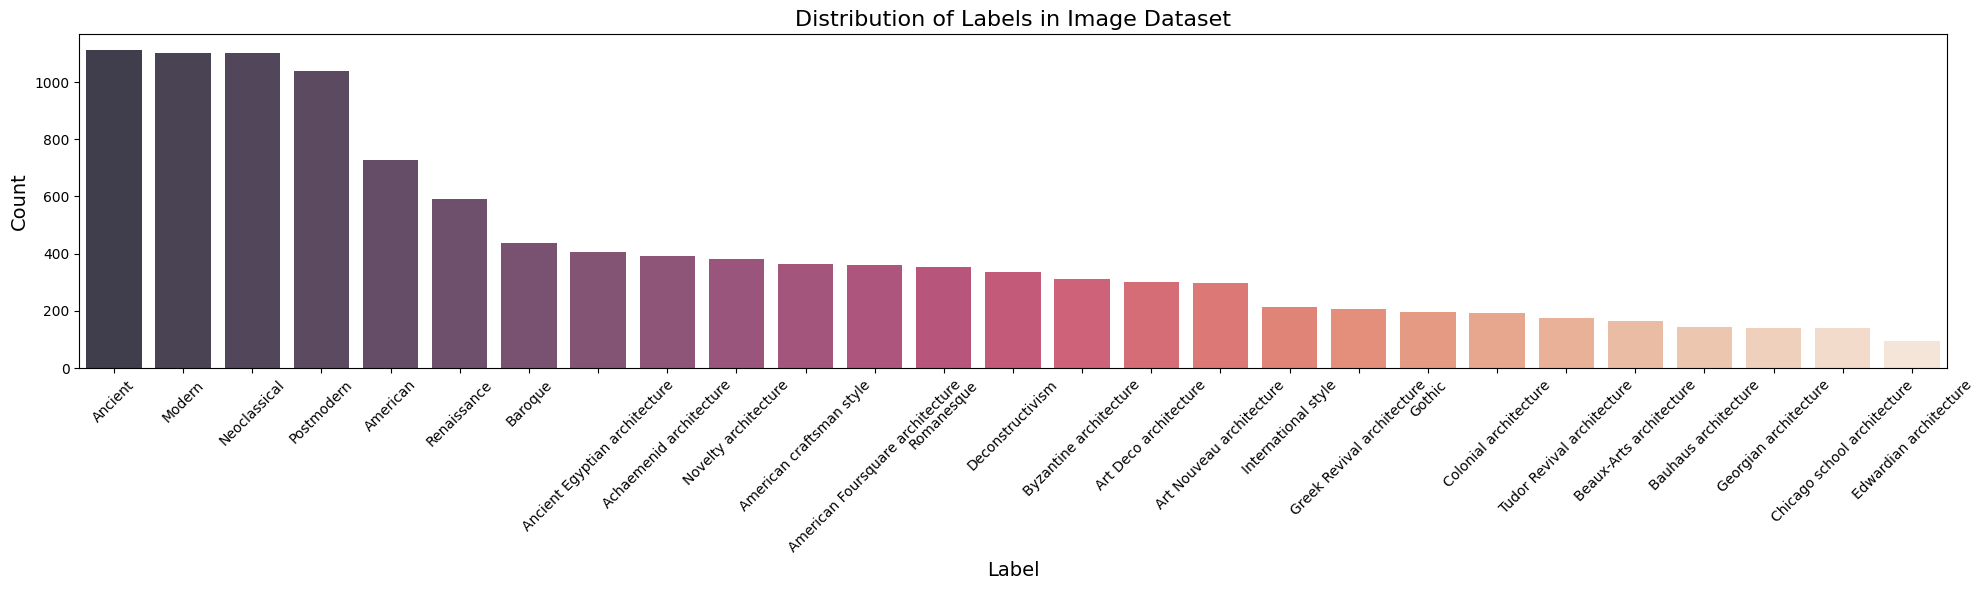

In [ ]:
print('Updated classes:', classes)
print('\nUpdated counts per class:')

for cls in classes:
    print(f'{cls}: {cnt[cls]}')

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')
plt.title('Distribution of Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

paths = [img for img, _ in dataset]
class_to_index = {cls: idx for idx, cls in enumerate(classes)}

label_vectors = []
for _, lbls in dataset:
    vec = [0] * len(classes)
    for lbl in lbls:
        vec[class_to_index[lbl]] = 1
    label_vectors.append(vec)


val_factor = 0.15
test_factor = 0.15

train_paths, test_paths, train_labels, test_labels = train_test_split(
    paths, label_vectors, test_size=test_factor, random_state=415
)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=val_factor/(1-test_factor), random_state=415
)


In [ ]:
batch_size = 32
img_size = 224

In [ ]:


def read_resize(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_size, img_size])
    img = img / 255.0
    img.set_shape([img_size, img_size, 3])
    return img, label

ds_train = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
ds_val   = tf.data.Dataset.from_tensor_slices((val_paths,   val_labels))
ds_test  = tf.data.Dataset.from_tensor_slices((test_paths,  test_labels))

ds_train = ds_train.map(read_resize, num_parallel_calls=tf.data.AUTOTUNE)
ds_val   = ds_val.map(read_resize,   num_parallel_calls=tf.data.AUTOTUNE)
ds_test  = ds_test.map(read_resize,  num_parallel_calls=tf.data.AUTOTUNE)

ds_train = ds_train.shuffle(1000).batch(batch_size)
ds_val   = ds_val.batch(batch_size)
ds_test  = ds_test.batch(batch_size)

for images, labels in ds_train.take(1):
    print("After resize + batch, train batch shape:", images.shape)
    break

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.025),
    tf.keras.layers.RandomZoom(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1)),
    tf.keras.layers.RandomTranslation(0.15,0.15),
    tf.keras.layers.RandomContrast(0.15),
    tf.keras.layers.RandomHeight(0.1),
    tf.keras.layers.RandomWidth(0.1),
    tf.keras.layers.Resizing(img_size, img_size),
    tf.keras.layers.GaussianNoise(0.025),
], name='augmentation')

train_ds = ds_train.map(
    lambda imgs, lbls: (data_augmentation(imgs, training=True), lbls),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

val_ds = ds_val.prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.prefetch(tf.data.AUTOTUNE)

for images, labels in train_ds.take(1):
    print("Final train batch shape:", images.shape)
    break


After resize + batch, train batch shape: (32, 224, 224, 3)
Final train batch shape: (32, 224, 224, 3)


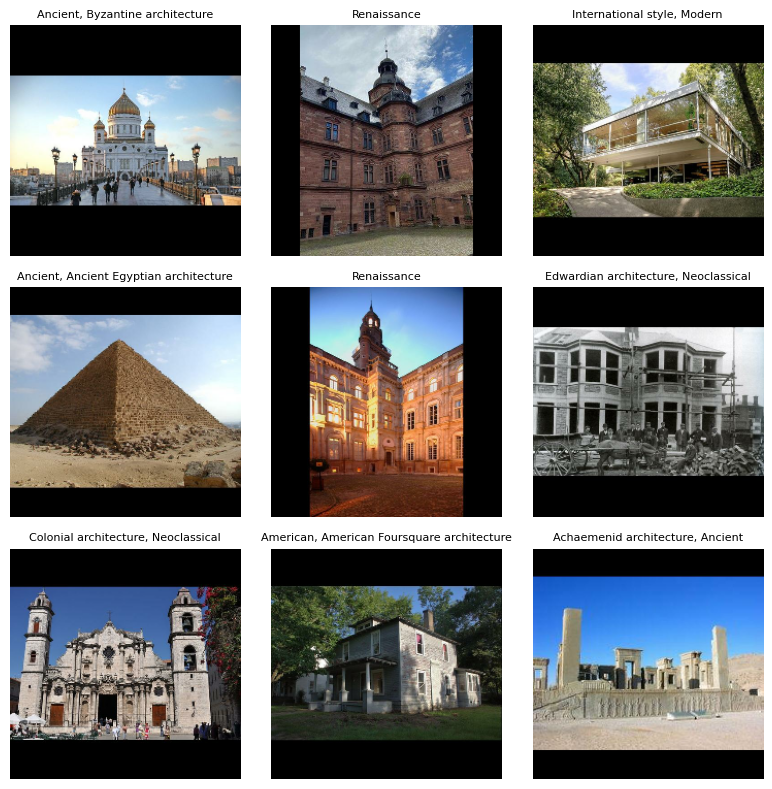

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(iter(ds_train))

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()

for i in range(9):
    img = images[i].numpy()
    lbl = labels[i].numpy()
    lbl_names = [classes[j] for j, v in enumerate(lbl) if v == 1]
    axes[i].imshow(img)
    axes[i].set_title(", ".join(lbl_names), fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

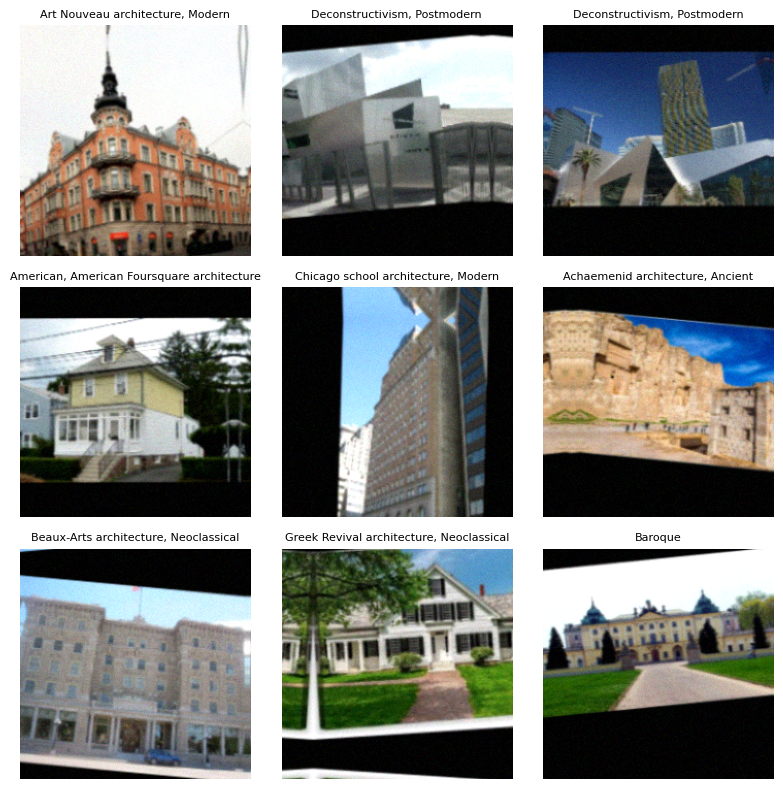

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_ds))

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()

for i in range(9):
    img = images[i].numpy()
    lbl = labels[i].numpy()
    lbl_names = [classes[j] for j, v in enumerate(lbl) if v == 1]
    axes[i].imshow(img)
    axes[i].set_title(", ".join(lbl_names), fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.applications import EfficientNetB7, EfficientNetB0, EfficientNetB5
from tensorflow.keras import layers, Model

base_model = EfficientNetB7(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size,img_size,3)
)
base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(classes), activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=outputs)


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 65,560,498 (250.09 MB)

 Trainable params: 1,456,155 (5.55 MB)

 Non-trainable params: 64,104,343 (244.54 MB)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        Precision(name='prec'),
        Recall(name='rec'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = model.fit(
    train_ds,
    epochs=30,
    steps_per_epoch=50,
    validation_data=val_ds,
    callbacks=callbacks
)


Epoch 1/30


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, metrics

base_model = tf.keras.applications.EfficientNetB5(
    include_top=False,
    input_shape=(img_size, img_size, 3),
    pooling='max',
    weights='imagenet'
)
base_model.trainable = False

x = base_model.output
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512)(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(len(classes), activation='sigmoid')(x)

model = models.Model(inputs=base_model.input, outputs=outputs)

model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_18        │ (None, 224, 224,  │          0 │ input_layer_10[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_9     │ (None, 224, 224,  │          7 │ rescaling_18[0][… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_19        │ (None, 224, 224,  │          0 │ normalization_9[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_19[0][… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      1,152 │ block1a_se_excit

 Total params: 29,712,146 (113.34 MB)

 Trainable params: 1,192,987 (4.55 MB)

 Non-trainable params: 28,519,159 (108.79 MB)

In [ ]:
optimizer = optimizers.RMSprop(learning_rate=1e-4)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-7
)
model_ckpt = callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

In [ ]:
print(len(base_model.layers))

578


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:200]:
    layer.trainable = False
for layer in base_model.layers[300:]:
    layer.trainable = False

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(1e-2),
  loss='binary_crossentropy',
  metrics=[tf.keras.metrics.BinaryAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop, reduce_lr, model_ckpt]
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 174s 460ms/step - acc: 0.8500 - auc: 0.6197 - loss: 0.3760 - val_acc: 0.9215 - val_auc: 0.6687 - val_loss: 0.2467 - learning_rate: 0.0100
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 140ms/step - acc: 0.9313 - auc: 0.7382 - loss: 0.2233 - val_acc: 0.9310 - val_auc: 0.6980 - val_loss: 0.2428 - learning_rate: 0.0100
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 139ms/step - acc: 0.9328 - auc: 0.7925 - loss: 0.2083 - val_acc: 0.9346 - val_auc: 0.8060 - val_loss: 0.2020 - learning_rate: 0.0100
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - acc: 0.9335 - auc: 0.8183 - loss: 0.1999 - val_acc: 0.9074 - val_auc: 0.7008 - val_loss: 0.3268 - learning_rate: 0.0100
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - acc: 0.9347 - auc: 0.8333 - loss: 0.1943 - val_acc: 0.9254 - val_auc: 0.7064 - val_loss: 0.2561 - learning_rate: 0.0100
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 29s 139ms/step - acc: 0.9359 - auc: 0.8442 - loss: 0.1894 - val_acc: 0.933

In [ ]:
history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr, model_ckpt]
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 141ms/step - acc: 0.9539 - auc: 0.9464 - loss: 0.1235 - val_acc: 0.9500 - val_auc: 0.9323 - val_loss: 0.1364 - learning_rate: 3.1250e-04
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - acc: 0.9550 - auc: 0.9499 - loss: 0.1205 - val_acc: 0.9498 - val_auc: 0.9321 - val_loss: 0.1371 - learning_rate: 3.1250e-04
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step - acc: 0.9540 - auc: 0.9479 - loss: 0.1220 - val_acc: 0.9493 - val_auc: 0.9296 - val_loss: 0.1386 - learning_rate: 3.1250e-04
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - acc: 0.9543 - auc: 0.9503 - loss: 0.1204 - val_acc: 0.9502 - val_auc: 0.9317 - val_loss: 0.1369 - learning_rate: 3.1250e-04
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step - acc: 0.9550 - auc: 0.9500 - loss: 0.1201 - val_acc: 0.9497 - val_auc: 0.9320 - val_loss: 0.1372 - learning_rate: 3.1250e-04
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - acc: 0.9548 - auc: 0.9494 - loss: 0.12

In [ ]:
save_dir = '/content/drive/MyDrive/multiclass-models'
os.makedirs(save_dir, exist_ok=True)

model_save_path = os.path.join(save_dir, 'efficientnetb5_multilabel_not_finetuned.keras')
model.save(model_save_path)

In [ ]:
base_model.trainable = True
# заморожуємо лише перші N шарів, розморожуємо решту
for layer in base_model.layers[:500]:
    layer.trainable = False
for layer in base_model.layers[500:]:
    layer.trainable = True

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(1e-4),
  loss='binary_crossentropy',
  metrics=[tf.keras.metrics.BinaryAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]
)

In [ ]:
history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr, model_ckpt]
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 153s 389ms/step - acc: 0.9464 - auc: 0.9106 - loss: 0.1535 - val_acc: 0.9447 - val_auc: 0.9243 - val_loss: 0.1544 - learning_rate: 1.0000e-04
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - acc: 0.9546 - auc: 0.9448 - loss: 0.1240 - val_acc: 0.9479 - val_auc: 0.9264 - val_loss: 0.1447 - learning_rate: 1.0000e-04
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - acc: 0.9553 - auc: 0.9504 - loss: 0.1196 - val_acc: 0.9495 - val_auc: 0.9276 - val_loss: 0.1415 - learning_rate: 1.0000e-04
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - acc: 0.9562 - auc: 0.9536 - loss: 0.1168 - val_acc: 0.9495 - val_auc: 0.9281 - val_loss: 0.1398 - learning_rate: 1.0000e-04
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - acc: 0.9582 - auc: 0.9568 - loss: 0.1127 - val_acc: 0.9500 - val_auc: 0.9290 - val_loss: 0.1397 - learning_rate: 1.0000e-04
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - acc: 0.9577 - auc: 0.9533 - loss: 0.1

In [ ]:
history3 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr, model_ckpt]
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - acc: 0.9587 - auc: 0.9581 - loss: 0.1109 - val_acc: 0.9515 - val_auc: 0.9305 - val_loss: 0.1382 - learning_rate: 5.0000e-05
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - acc: 0.9605 - auc: 0.9627 - loss: 0.1057 - val_acc: 0.9507 - val_auc: 0.9274 - val_loss: 0.1401 - learning_rate: 5.0000e-05
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - acc: 0.9593 - auc: 0.9626 - loss: 0.1070 - val_acc: 0.9507 - val_auc: 0.9270 - val_loss: 0.1410 - learning_rate: 5.0000e-05
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - acc: 0.9602 - auc: 0.9628 - loss: 0.1064 - val_acc: 0.9506 - val_auc: 0.9285 - val_loss: 0.1402 - learning_rate: 5.0000e-05
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - acc: 0.9611 - auc: 0.9638 - loss: 0.1043 - val_acc: 0.9504 - val_auc: 0.9301 - val_loss: 0.1396 - learning_rate: 5.0000e-05
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - acc: 0.9607 - auc: 0.9637 - loss: 0.10

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:400]:
    layer.trainable = False
for layer in base_model.layers[400:]:
    layer.trainable = True

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(5e-5),
  loss='binary_crossentropy',
  metrics=[tf.keras.metrics.BinaryAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]
)

In [ ]:
history4 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr, model_ckpt]
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 182s 432ms/step - acc: 0.9536 - auc: 0.9463 - loss: 0.1240 - val_acc: 0.9483 - val_auc: 0.9239 - val_loss: 0.1471 - learning_rate: 5.0000e-05
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - acc: 0.9563 - auc: 0.9537 - loss: 0.1169 - val_acc: 0.9496 - val_auc: 0.9271 - val_loss: 0.1418 - learning_rate: 5.0000e-05
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - acc: 0.9572 - auc: 0.9558 - loss: 0.1137 - val_acc: 0.9500 - val_auc: 0.9285 - val_loss: 0.1406 - learning_rate: 5.0000e-05
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 126ms/step - acc: 0.9587 - auc: 0.9574 - loss: 0.1112 - val_acc: 0.9498 - val_auc: 0.9295 - val_loss: 0.1395 - learning_rate: 5.0000e-05
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 125ms/step - acc: 0.9589 - auc: 0.9610 - loss: 0.1081 - val_acc: 0.9502 - val_auc: 0.9270 - val_loss: 0.1404 - learning_rate: 5.0000e-05
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 126ms/step - acc: 0.9600 - auc: 0.9631 - loss: 0.1

In [ ]:
save_dir = '/content/drive/MyDrive/multiclass-models'
os.makedirs(save_dir, exist_ok=True)

model_save_path = os.path.join(save_dir, 'efficientnetb5_multilabel_fine_tuned_copy.keras')
model.save(model_save_path)

In [ ]:
results = model.evaluate(test_ds, verbose=False)
print(f"Test loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")


Test loss: 0.1144
Test Binary Accuracy: 0.9594
Test AUC: 0.9461


In [ ]:
print(len(classes))

27


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


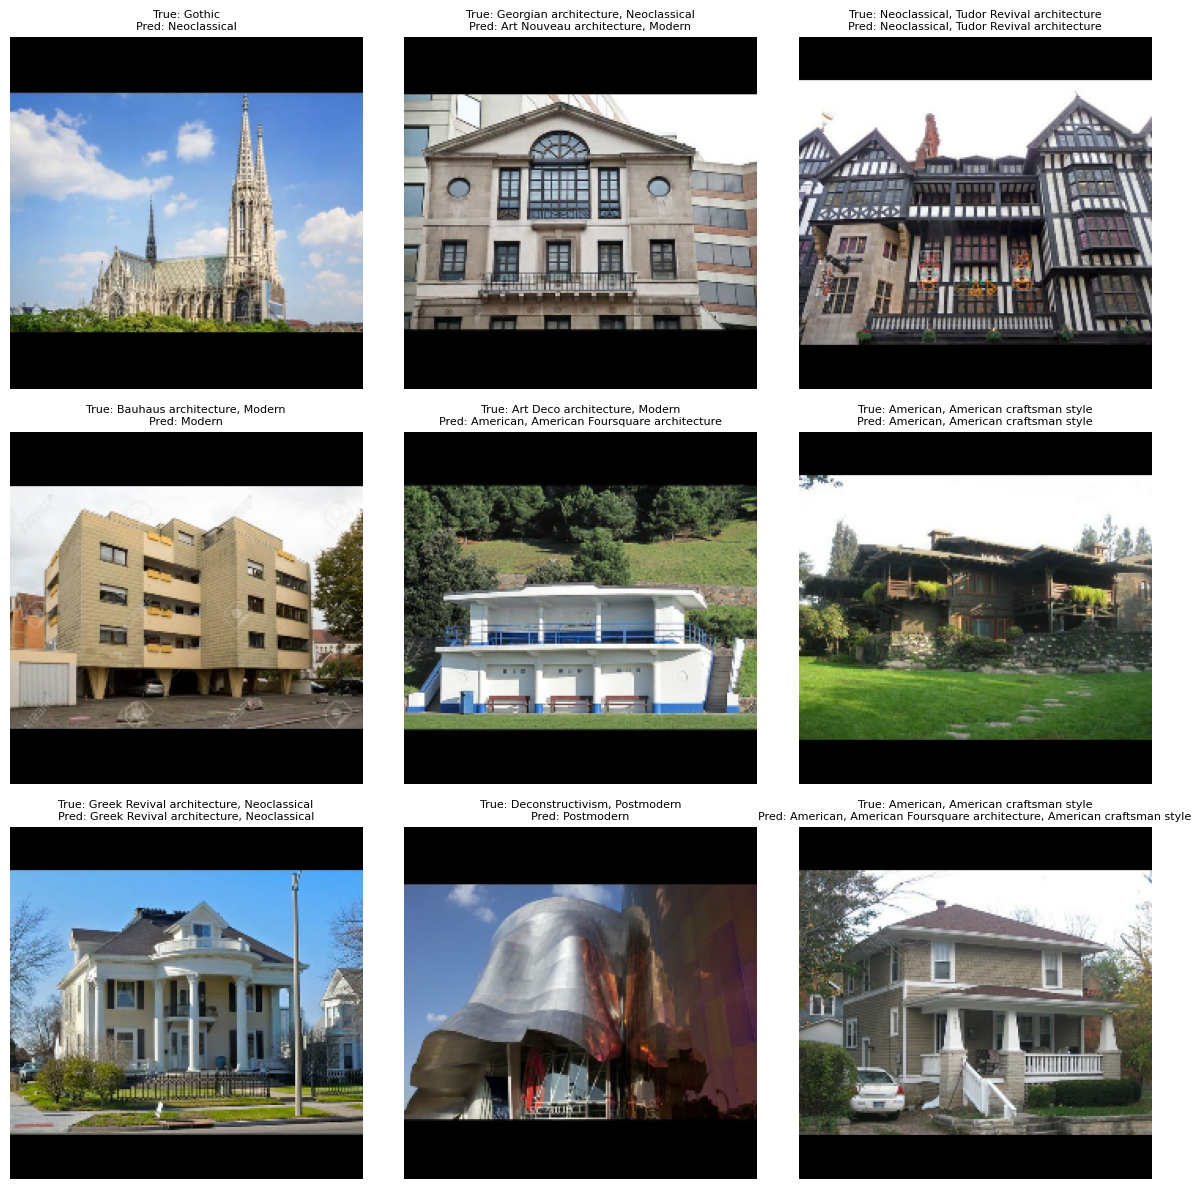

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(iter(test_ds.shuffle(20)))
pred_probs = model.predict(images)
pred_labels = (pred_probs >= 0.5).astype(int)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = images[i].numpy()
    true = [classes[j] for j, v in enumerate(labels[i].numpy()) if v == 1]
    pred = [classes[j] for j, v in enumerate(pred_labels[i]) if v == 1]
    ax.imshow(img)
    ax.set_title(f"True: {', '.join(true)}\nPred: {', '.join(pred)}", fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = np.vstack([y for x, y in test_ds])
y_pred = model.predict(test_ds)
y_pred_bin = (y_pred >= 0.5).astype(int)

print(classification_report(y_true, y_pred_bin, target_names=classes, zero_division=0))

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
                                  precision    recall  f1-score   support

         Achaemenid architecture       0.82      0.75      0.78        60
                        American       0.89      0.88      0.89       106
American Foursquare architecture       0.82      0.67      0.74        61
        American craftsman style       0.70      0.67      0.68        45
                         Ancient       0.97      0.86      0.91       167
   Ancient Egyptian architecture       0.98      0.75      0.85        60
           Art Deco architecture       0.61      0.44      0.51        32
        Art Nouveau architecture       0.63      0.69      0.66        49
                         Baroque       0.80      0.62      0.70        58
            Bauhaus architecture       0.75      0.27      0.40        22
         Beaux-Arts architecture       1.00      0.03      0.07        29
          Byzantine architecture       0.88      0.79      0.83        

In [ ]:
import matplotlib.pyplot as plt


def draw_history(history):
  # Loss
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # AUC
  plt.plot(history.history['auc'], label='train_auc')
  plt.plot(history.history['val_auc'], label='val_auc')
  plt.title('AUC over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('AUC')
  plt.legend()
  plt.show()


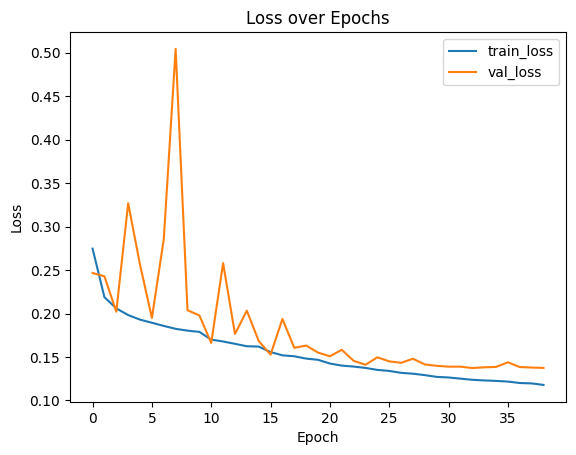

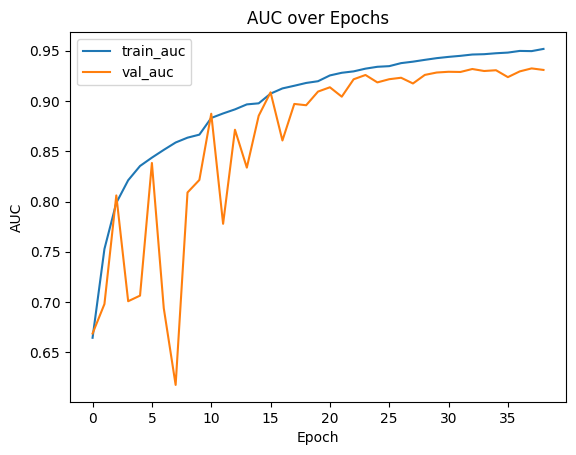

In [ ]:
draw_history(history)


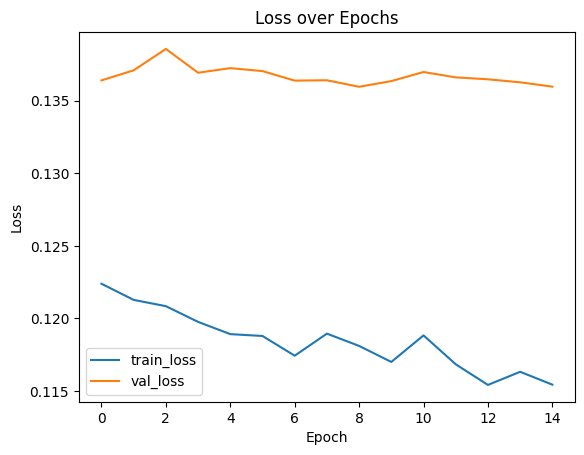

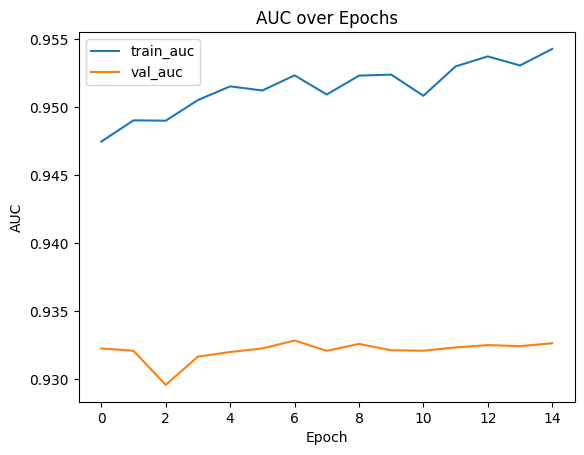

In [ ]:
draw_history(history1)


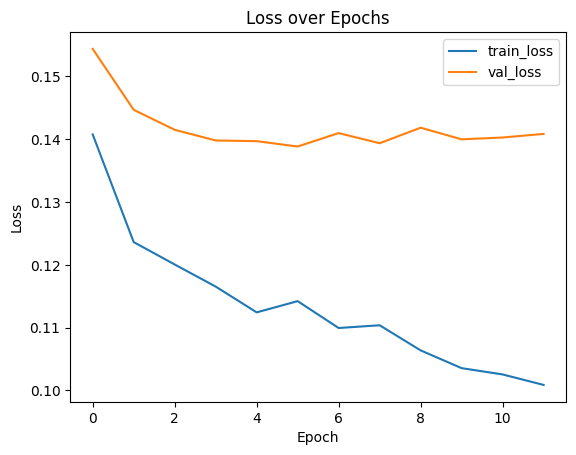

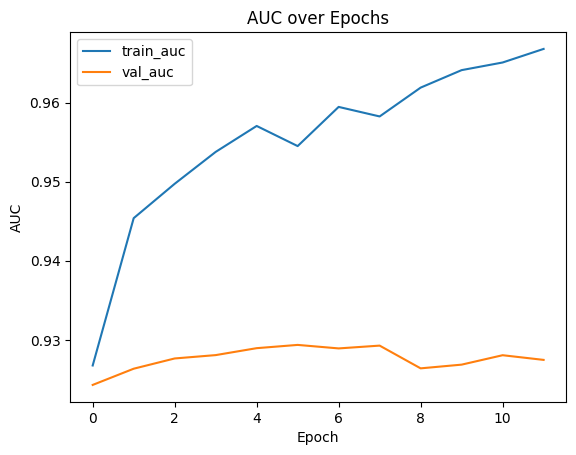

In [ ]:
draw_history(history2)


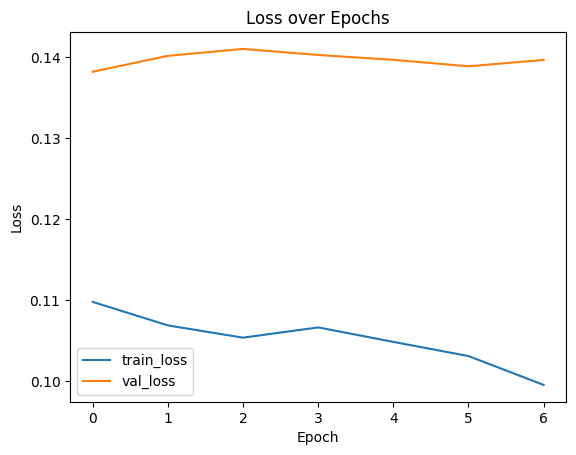

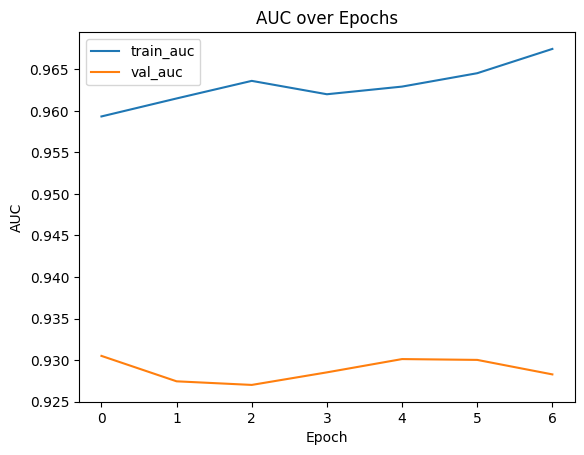

In [ ]:
draw_history(history3)


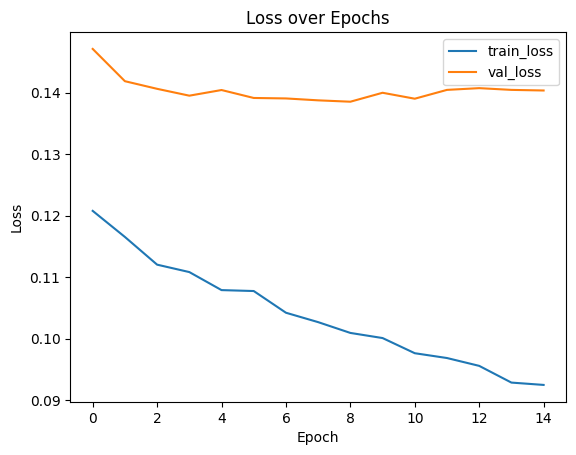

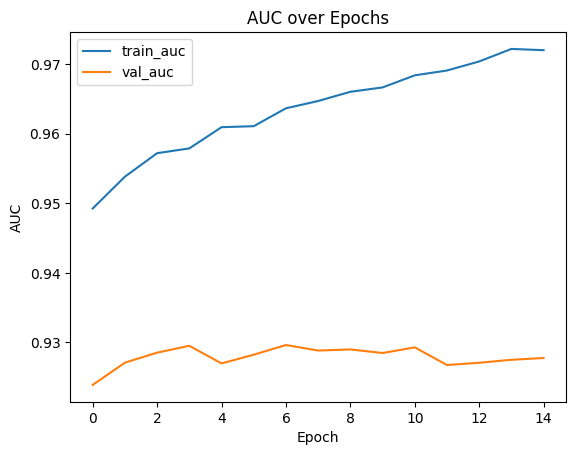

In [ ]:
draw_history(history4)


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/multiclass-models/efficientnetb5_multilabel_fine_tuned_copy.keras")